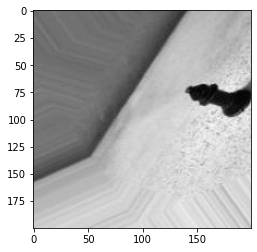

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "drive/MyDrive/Chess_Piece_Images"
CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , 
              "Black_King" , "White_King"  , "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

for category in CATEGORIES : 
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path) :
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE )  # cv2.IMREAD_GRAYSCALE

        #gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        plt.imshow(img_array , cmap='gray')
        break
    break

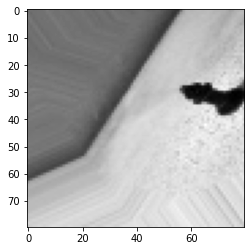

In [4]:
IMG_SIZE = 80

new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
#gray  = gray = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)

plt.imshow(new_array , cmap="gray")
plt.show()

In [5]:
training_data = []

def create_training_data() :
    for category in CATEGORIES : 
        path = os.path.join(DATADIR,category)
    
        class_num = CATEGORIES.index(category) 
    
        for img in os.listdir(path) :           
            
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE
                
            img_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))

            stacked_img = np.stack((img_array,)*3, axis=-1)
            #training_data.append([new_array, class_num])
                
            #gray = cv2.cvtColor(new_array)

            #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

            training_data.append([stacked_img  , class_num])
            
            
        
create_training_data()

(80, 80, 3)


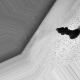

In [6]:
from google.colab.patches import cv2_imshow
new_image = cv2.cvtColor(training_data[0][0] , cv2.COLOR_BGR2RGB)
print(new_image.shape)
#plt.imshow(new_image)
cv2_imshow(new_image)

In [7]:
import random
random.shuffle(training_data)


Text(0.5, 1.0, 'Black_King')

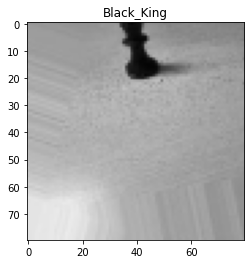

In [8]:
import random

index = random.randint(0,2520)
img_arr = cv2.cvtColor(training_data[index][0] , cv2.COLOR_BGR2RGB)




y = training_data[index][1]

plt.imshow(img_arr , cmap="gray")
plt.title(CATEGORIES[y])

In [9]:
X = []
y = []

for features , label in training_data :
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE , IMG_SIZE , 3) 

In [10]:
X = X/255.0

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [12]:
import tensorflow as tf


X_train , y_train = tf.constant(X_train , dtype = tf.float64) , tf.constant(y_train , dtype = tf.float64)
X_test , y_test = tf.constant(X_test , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [ ]:
# The best learning rate is around 10**-3

import tensorflow as tf

# Set random seed 
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(80, 80, 1) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])






#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 75 ,                        
                        validation_data = (X_test , y_test))

Epoch 1/75
672/672 [==============================] - 27s 24ms/step - loss: 1.8789 - accuracy: 0.1786 - val_loss: 1.6953 - val_accuracy: 0.2151
Epoch 2/75
672/672 [==============================] - 15s 23ms/step - loss: 1.5433 - accuracy: 0.3061 - val_loss: 1.3953 - val_accuracy: 0.3906
Epoch 3/75
672/672 [==============================] - 15s 23ms/step - loss: 1.3394 - accuracy: 0.4221 - val_loss: 1.4476 - val_accuracy: 0.3831
Epoch 4/75
672/672 [==============================] - 15s 23ms/step - loss: 1.2096 - accuracy: 0.4972 - val_loss: 1.0953 - val_accuracy: 0.5571
Epoch 5/75
672/672 [==============================] - 15s 23ms/step - loss: 0.9388 - accuracy: 0.6234 - val_loss: 0.8768 - val_accuracy: 0.6366
Epoch 6/75
672/672 [==============================] - 15s 23ms/step - loss: 0.7575 - accuracy: 0.6987 - val_loss: 0.8995 - val_accuracy: 0.6453
Epoch 7/75
672/672 [==============================] - 15s 23ms/step - loss: 0.6237 - accuracy: 0.7572 - val_loss: 0.6110 - val_accuracy:

In [ ]:
cnn_model.save("validation_94_grayscale.h5")

### Another model by changing network architecture and IMG_SIZE 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "drive/MyDrive/Chess_Piece_Images"

CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , 
              "Black_King" , "White_King"  , "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

In [ ]:
import os

training_data = []

def create_training_data() :
    for category in CATEGORIES : 
        path = os.path.join(DATADIR,category)
    
        class_num = CATEGORIES.index(category) 
    
        for img in os.listdir(path) :           
            
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE
                
            img_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
            #training_data.append([new_array, class_num])
                
            #gray = cv2.cvtColor(new_array)

            #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

            training_data.append([img_array  , class_num])
            
            
        
create_training_data()

KeyboardInterrupt: ignored

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
IMG_SIZE = 128

X = []
y = []

for features , label in training_data :
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE , IMG_SIZE , 1) 

In [ ]:
X = X/255.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [ ]:
import tensorflow as tf


X_train , y_train = tf.constant(X_train , dtype = tf.float64) , tf.constant(y_train , dtype = tf.float64)
X_test , y_test = tf.constant(X_test , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [ ]:
import tensorflow as tf

# Set random seed 
tf.random.set_seed(42)

#1. Define a model
cnn_model_2 = tf.keras.Sequential([
                                 tf.keras.Input( shape=(IMG_SIZE, IMG_SIZE, 1) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model_2.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])






#3. Fit the data
history = cnn_model_2.fit(X_train , y_train , epochs = 75 ,                        
                        validation_data = (X_test , y_test))

In [ ]:
cnn_model_2.save("validation_94_grayscale.h5")

# Using Pre-Trained VGG16 Model


In [13]:
from tensorflow.keras.applications import VGG16

vgg = VGG16(weights = "imagenet", include_top = False, input_tensor = tf.keras.layers.Input(shape = (IMG_SIZE,IMG_SIZE,3)) )
vgg.trainable = False

flatten = vgg.output
flatten = tf.keras.layers.Flatten()(flatten)

output_layer = tf.keras.layers.Dense(12, activation = "softmax")(flatten)

model_vgg16 = tf.keras.models.Model(inputs=vgg.input, outputs=output_layer)

58900480/58889256 [==============================] - 1s 0us/step


In [14]:
model_vgg16.compile(loss = "sparse_categorical_crossentropy",
                    optimizer = "adam",
                    metrics = ["accuracy"] )

model_vgg16.fit(X_train, y_train, epochs = 75,
                validation_data = (X_test, y_test), 
                batch_size = 32)

Epoch 1/75
672/672 [==============================] - 38s 38ms/step - loss: 1.4627 - accuracy: 0.5252 - val_loss: 1.1004 - val_accuracy: 0.6727
Epoch 2/75
672/672 [==============================] - 23s 34ms/step - loss: 0.9734 - accuracy: 0.6979 - val_loss: 0.9141 - val_accuracy: 0.7198
Epoch 3/75
672/672 [==============================] - 23s 34ms/step - loss: 0.8145 - accuracy: 0.7509 - val_loss: 0.8351 - val_accuracy: 0.7291
Epoch 4/75
672/672 [==============================] - 23s 35ms/step - loss: 0.7271 - accuracy: 0.7775 - val_loss: 0.7554 - val_accuracy: 0.7533
Epoch 5/75
672/672 [==============================] - 24s 35ms/step - loss: 0.6610 - accuracy: 0.7976 - val_loss: 0.7049 - val_accuracy: 0.7732
Epoch 6/75
672/672 [==============================] - 24s 35ms/step - loss: 0.6148 - accuracy: 0.8106 - val_loss: 0.6639 - val_accuracy: 0.7873
Epoch 7/75
672/672 [==============================] - 24s 35ms/step - loss: 0.5784 - accuracy: 0.8205 - val_loss: 0.6568 - val_accuracy:

In [15]:
model_vgg16.save("vgg_16.h5")

In [16]:
from google.colab import files
files.download('vgg_16.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>